# SVR机器学习回归,波士顿地区房价数据集

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.datasets import load_boston
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
import seaborn as sns
sns.set_theme(style='whitegrid')

In [3]:
x,y = load_boston(return_X_y=True)
feature_names = load_boston().feature_names
df = pd.DataFrame(x,columns=feature_names)
df['price'] = y
df

NameError: name 'load_boston' is not defined

<AxesSubplot: >

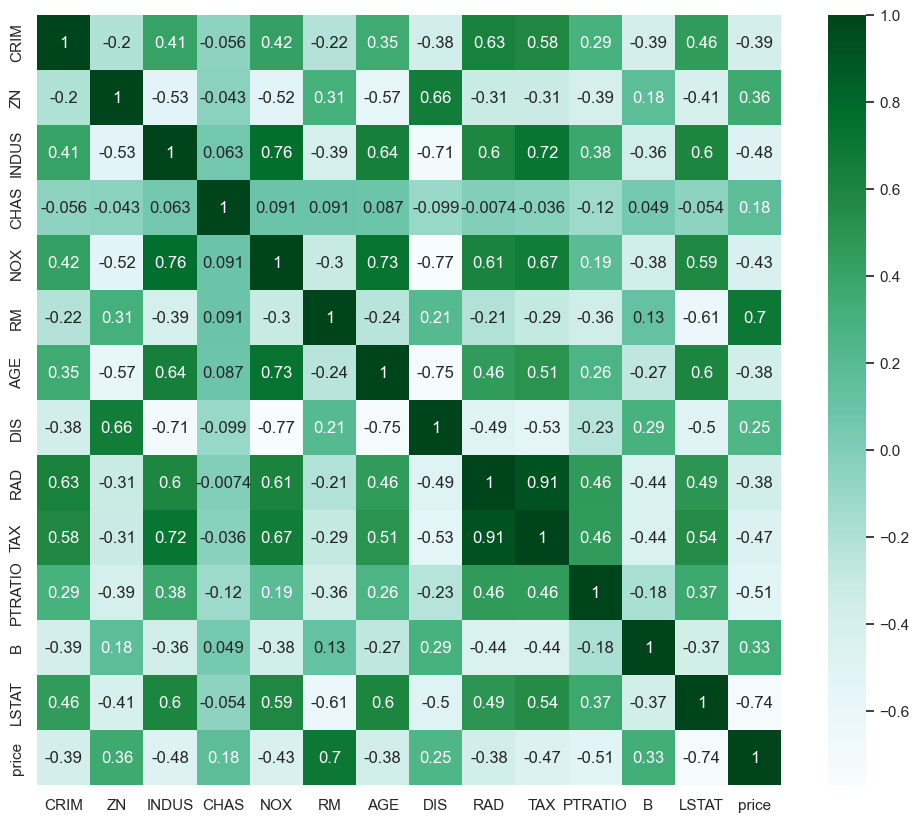

In [5]:
corrboston = df.corr()     # Corr()函数可以计算前几列数据与结果之间的相关性
plt.figure(figsize=(12,10))
sns.heatmap(corrboston,annot=True,cmap='BuGn')

In [6]:
corrboston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### 查看是否穿过查尔斯河对价格的影响

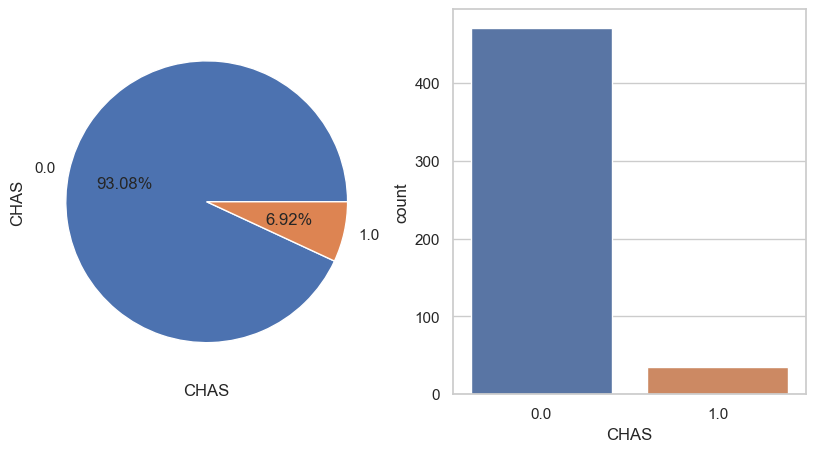

In [73]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

df['CHAS'].value_counts().plot.pie(ax=ax[0],shadow=False,autopct='%1.2f%%')
ax[0].set_xlabel('CHAS')

sns.countplot(x=df['CHAS'],ax=ax[1])
ax[1].set_xlabel("CHAS")
plt.show()

查看两种不同类型的房子的价值

In [76]:
CHAS = df[['CHAS','price']]
CHAS

,CHAS,price
0,0.0,24.0
1,0.0,21.6
2,0.0,34.7
3,0.0,33.4
4,0.0,36.2
...,...,...
501,0.0,22.4
502,0.0,20.6
503,0.0,23.9
504,0.0,22.0


In [77]:
CHAS = CHAS.pivot_table(
    values = 'price',
    index = 'CHAS',
    aggfunc = 'mean'
)     # 该函数返回一个数据透视表,aggfunc=mean=表示对数据取平均数
CHAS = CHAS.sort_values(by='price',ascending=False)
CHAS

,price
CHAS,
1.0,28.440000
0.0,22.093843



查看各个字段与价格之巅的散点图

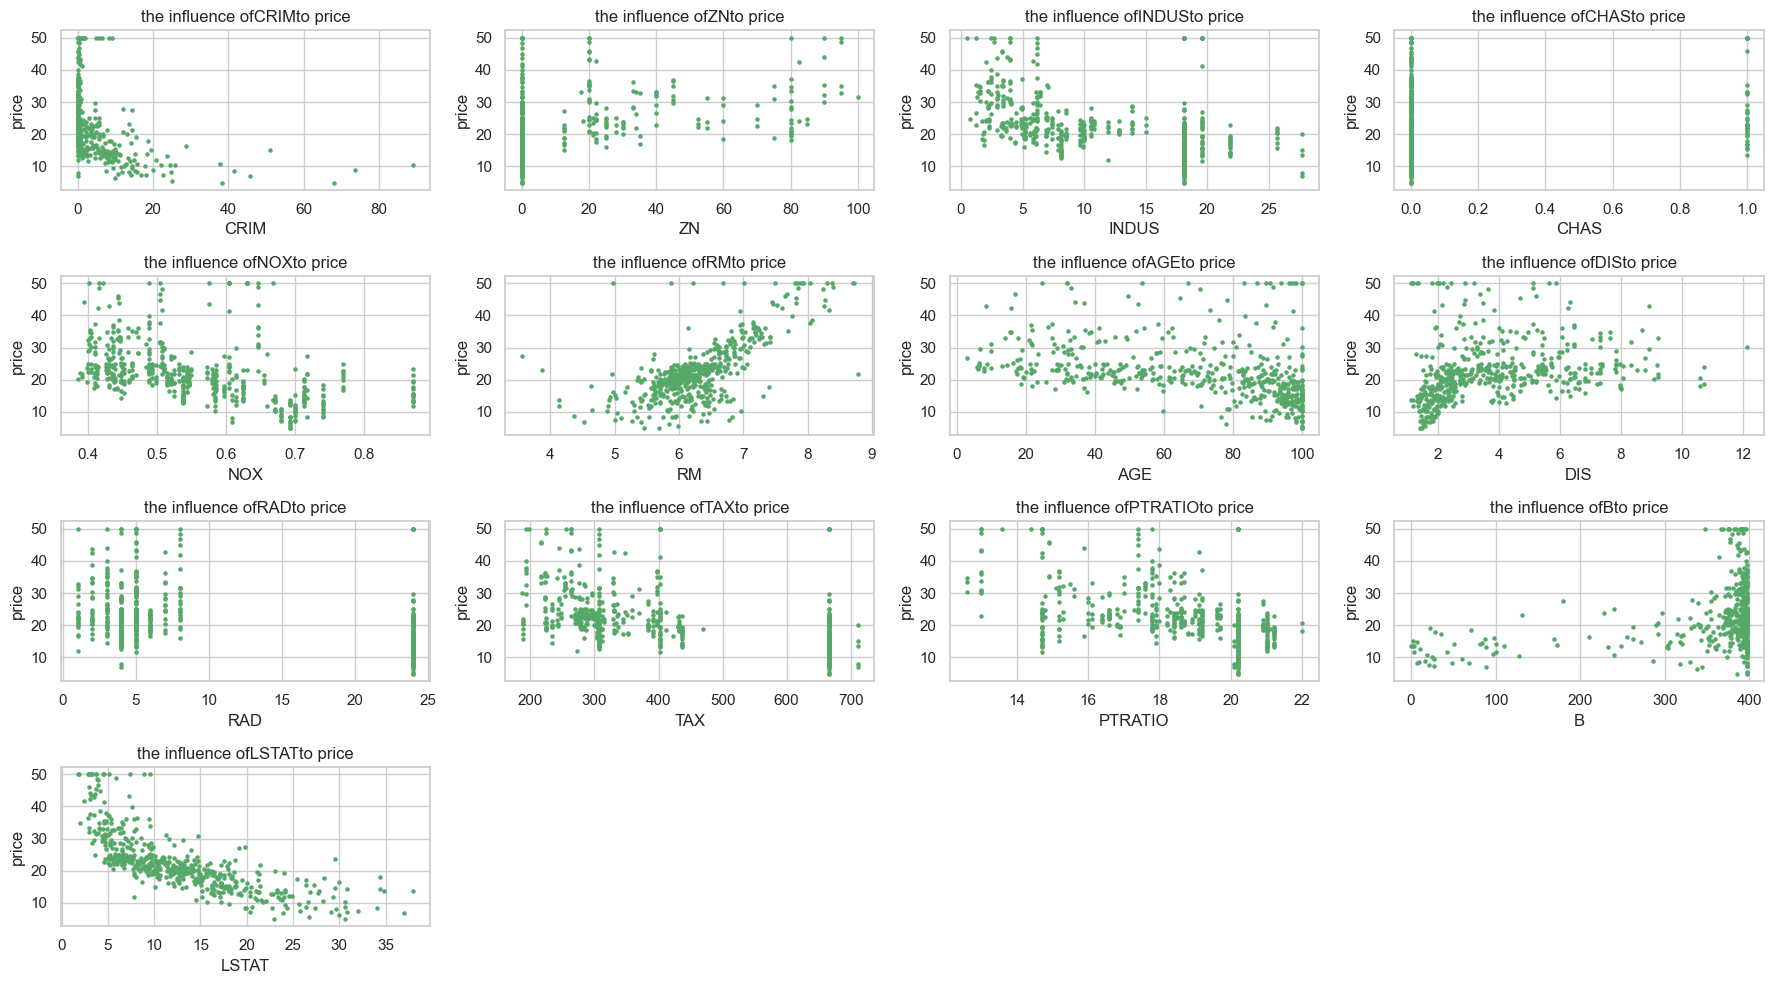

In [81]:
plt.figure(figsize=(18,10))
# plt.rcParams[]
for i in range(13):
    plt.subplot(4,4,i+1)
    plt.scatter(x[:,i],y,s=5,c='g')
    plt.xlabel(feature_names[i])
    plt.ylabel('price')
    plt.title('the influence of'+feature_names[i]+'to price')

plt.tight_layout()
plt.show()


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [42]:
linear_svr = SVR(kernel='linear')
linear_svr.fit(x_train,y_train)

SVR(kernel='linear')

In [43]:
pred = linear_svr.predict(x_test)

In [44]:
linear_svr.score(x_train,y_train)

0.6951584310350113

In [45]:
mean_squared_error(y_test,pred)

18.430270015447277

In [46]:
r2_score(y_test,pred)

0.7360788447469061

In [47]:
mean_absolute_error(y_test,pred)

2.685773037662826

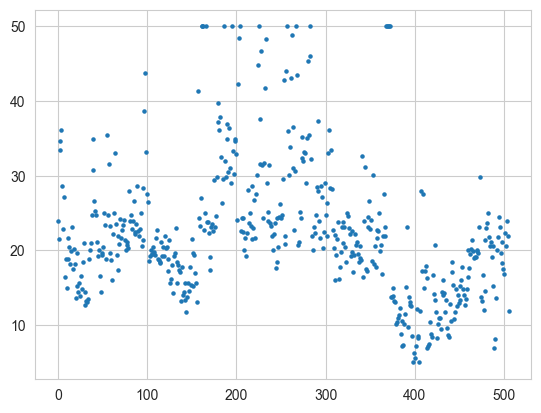

In [48]:
plt.scatter(x=range(506),y=y,s=5)

### K折验证


In [10]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False)

In [12]:
# for train_index, test_index in kf.split(x):
    # print(train_index,test_index)

[102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346 347 34